# [Atractor de lorentz](https://en.wikipedia.org/wiki/Lorenz_system)



Dada el siguiente sistema de ecuaciones, asociadas a un modelo simplificado de la atomosfera, encontrar los valores de x, y, z.

\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

El modelo anteror permite describir de un a manera simplificada el movimiento atmosférico de masas de aire, los valores x, y, z se corresponden a posiciones de un volumen que contiene  una masa de aire, y los párametros $\sigma$, $\beta$ y  $\rho$ hacen referencia a, las siguientes cantidades fisicas:

\begin{equation}
\sigma = \frac{\mathrm{viscosidad}}{\mathrm{conductividad\ térmica }},
\end{equation}

$\rho$ hace refencia al término de convección entre el suelo y el techo del volumen discretizado.

\begin{equation}
\rho =\frac{g\beta}{v \alpha} (T_s-T_{\infty})L^3
\end{equation}

y $\beta=\frac{\mathrm{Ancho\ del\ cubo}}{\mathrm{Altura\ de\ la\ caja}}$ es un termino geométrico.


<!-- Tiene puntos de equilibrio en 
- $(x, y, z)=(0,0,0)$
- $(\pm \sqrt{\beta(\rho-1}),\pm \sqrt{\beta(\rho-1}),\rho-1)$

El sistema de ecuaciones anterior puede ser escrito como:
\begin{equation}
\begin{pmatrix}
-\sigma & \sigma & 0\\
\rho-z & -1 & 0\\
y & 0 & -\beta
\end{pmatrix}
\end{equation} -->



Emplee la integración: [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), realice la integración del sistema de ecuaciones diferenciales

1. Importe las librerias odeint, numpy, matplotlib


2. Defina una función con el sistema de ecuaciones a integrar, para ello construya el siguiente el sistema de ecuaciones en una función:


Puede ser escrito como: 

\begin{equation}
\begin{bmatrix}
\frac{\mathrm{d}U_0}{\mathrm{d}t}\\
\frac{\mathrm{d}U_1}{\mathrm{d}t}\\
\frac{\mathrm{d}U_2}{\mathrm{d}t}
\end{bmatrix}=
\begin{bmatrix}
\sigma (U_1-U_0)\\
U_0(\rho-U_2)\\
U_0U_1-\beta U_2\\
\end{bmatrix}
\end{equation}


3. Solucione el sistema de ecuaciones para los siguientes parametros y  realice un gráfico en 3D de la solución, empleando el código de mas abajo.

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 10$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1.5,1,5,1.5]$


- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1,1,1]$

- $\sigma = 10.0$, $\beta = 8./3$ ,$\rho = 25$  con condiciones iniciales,  $x_0,y_0,z_0 = [1001,1.001,1.001]$

```
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z)
plt.draw()
plt.show()
```

5. ¿Como puede estar seguro de que la solucion es la esperada?


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


\begin{equation}
\frac{\mathrm{d}x}{\mathrm{d}t} = \sigma (y-x)
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} = x(\rho-z)-y
\end{equation}

\begin{equation}
\frac{\mathrm{d}z}{\mathrm{d}t} = xy-\beta z
\end{equation}

In [ ]:
def f(U,t,s=10.,b=8./3,p=10):
  return np.array([s*(U[1]-U[0]),
                   U[0]*(p-U[2])-U[1],
                   U[0]*U[1]-b*U[2]])

In [ ]:
U0=np.array([1,1,1])
U1=np.array([1.5,1.5,1.5])

In [ ]:
t=np.arange(0,50,0.01)
Usol=odeint(f,U0,t)
Usol1=odeint(f,U1,t,args=(10.,8./3,25.))
Usol2=odeint(f,U0,t,args=(10.,8./3,25.))
Usol3=odeint(f,U0+0.001,t,args=(10.,8./3,25.))

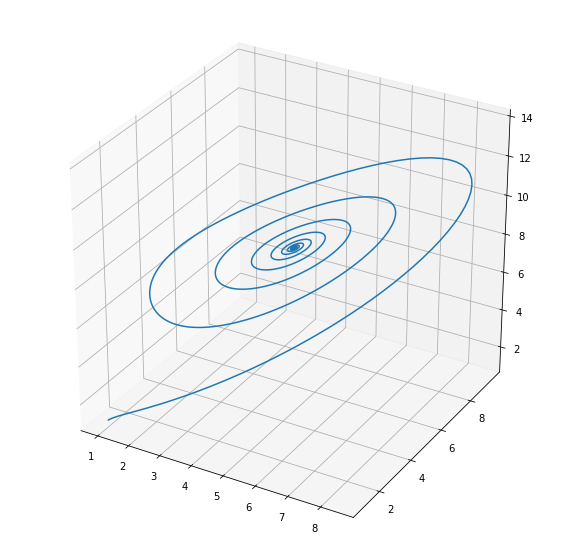

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(Usol[:,0],Usol[:,1],Usol[:,2])
plt.draw()
plt.show()

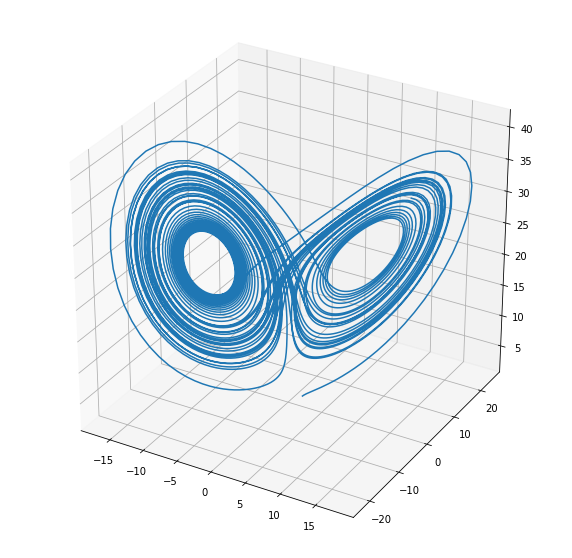

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(Usol1[:,0],Usol1[:,1],Usol1[:,2])
plt.draw()
plt.show()

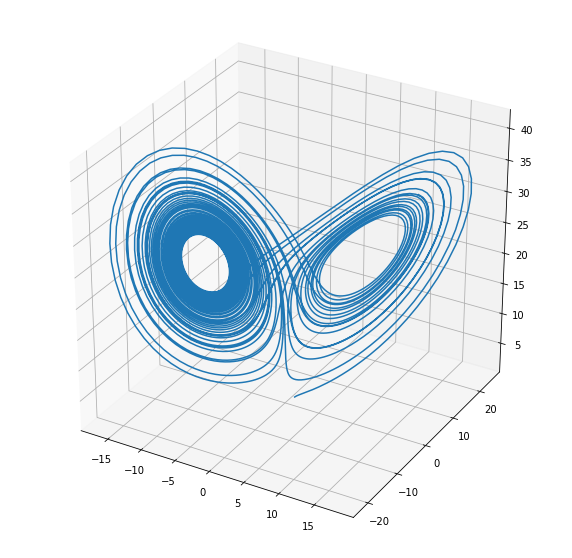

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(Usol2[:,0],Usol2[:,1],Usol2[:,2])
plt.draw()
plt.show()

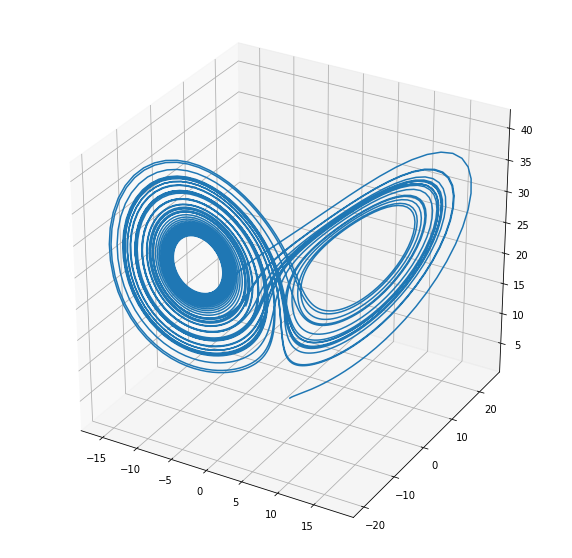

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection="3d")
ax.plot(Usol3[:,0],Usol3[:,1],Usol3[:,2])
plt.draw()
plt.show()

In [ ]:
def LorenzAtractor(U0,sigma,beta,rho):
  def f(U,t):
    return np.array([sigma*(U[1]-U[0]),
                    U[0]*(rho-U[2])-U[1],
                    U[0]*U[1]-beta*U[2]])

  t=np.arange(0,50,0.01)
  Usol=odeint(f,U0,t)

  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection="3d")
  ax.set(xlim=(-20,20),ylim=(-20,20),zlim=(0,40))
  return ax.plot(Usol[:,0],Usol[:,1],Usol[:,2])

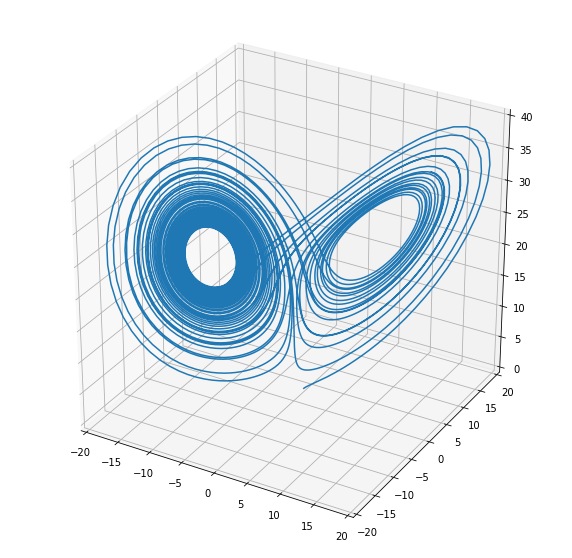

In [ ]:
LorenzAtractor([1.,1.,1.],10.,8./3,25.)